Dataset: inverted_pendulum
X_train: torch.Size([6000, 4]), Y_train: torch.Size([6000, 1])
Dataset: swimmer
X_train: torch.Size([6000, 8]), Y_train: torch.Size([6000, 2])
Dataset: ant
X_train: torch.Size([6000, 27]), Y_train: torch.Size([6000, 8])
Dataset: halfcheetah
X_train: torch.Size([6000, 17]), Y_train: torch.Size([6000, 6])
Dataset: walker2d
X_train: torch.Size([6000, 17]), Y_train: torch.Size([6000, 6])


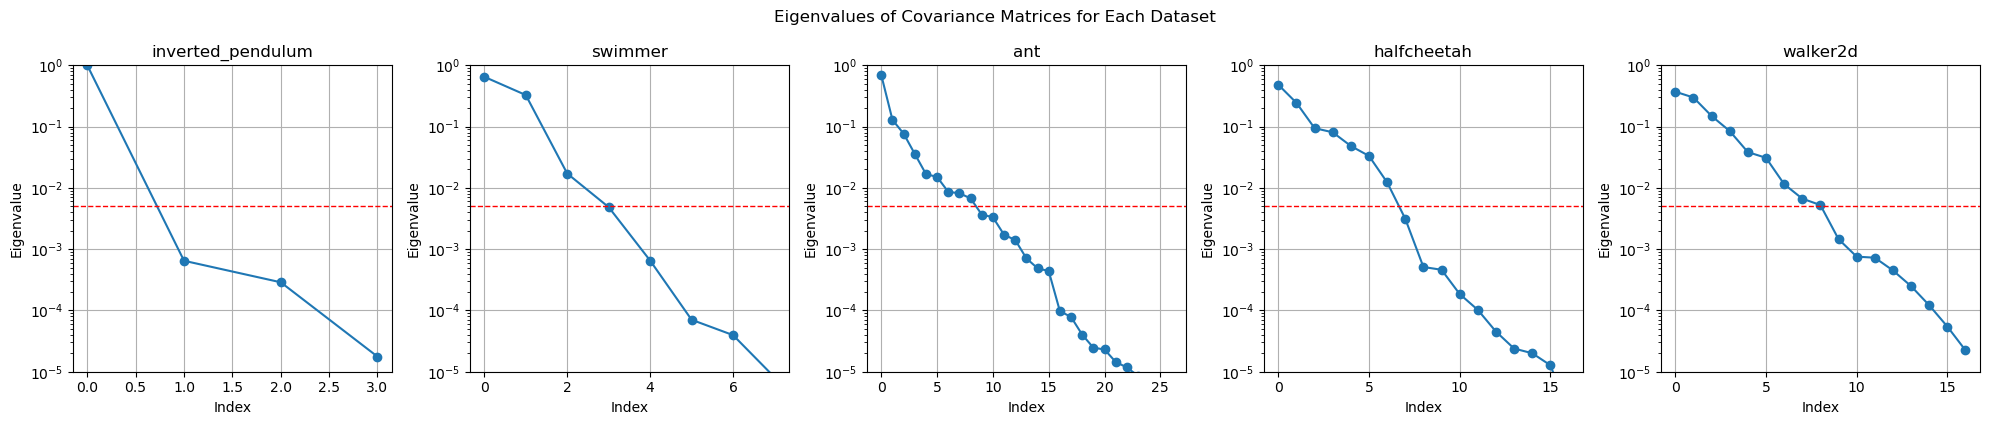

In [21]:
from smooth.lib import imitation
import torch
import matplotlib.pyplot as plt

datasets = ['inverted_pendulum', 'swimmer', 'ant', 'halfcheetah', 'walker2d']

# Create a 1x5 figure
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx, dataset in enumerate(datasets):
    data = imitation.create_imitation_dataset_trajectories(dataset,
                                        n_train=20,
                                        n_unlab=10,
                                        n_test=10,
                                        T=300)

    X_train, Y_train, X_unlab, y_unlab, X_test, Y_test = data
    print(f"Dataset: {dataset}")
    print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")

    # Subtract mean along each column
    mean = X_train.mean(dim=0)
    data_centered = X_train - mean

    # Compute covariance matrix
    cov_matrix = (data_centered.T @ data_centered) / (X_train.size(0) - 1)

    # Eigen decomposition
    eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
    sorted_indices = torch.argsort(eigenvalues, descending=True)
    eigenvalues_sorted = eigenvalues[sorted_indices]
    total_variance = eigenvalues_sorted.sum()
    
    # Plot on corresponding subplot
    ax = axes[idx]
    ax.plot(eigenvalues_sorted.numpy()/total_variance, "o-")
    ax.axhline(y=0.005, color='red', linestyle='--', linewidth=1)
    ax.set_title(dataset)
    ax.set_xlabel("Index")
    ax.set_ylabel("Eigenvalue")
    ax.set_yscale("log")  # Correct method on the Axes object
    ax.set_ylim(1e-5, 1)
    ax.grid(True)

plt.tight_layout()
plt.suptitle("Eigenvalues of Covariance Matrices for Each Dataset", y=1.05)
plt.savefig("eigenvalues_plot.png", dpi=300)
